Analysis of 2016 Election individual donor contributions to Hillary Clinton and Donald Trump.  Data obtained from United States Federal Election Commission website.  Data analyzed with Python pandas package. 

URL for FEC data: http://www.fec.gov/disclosurep/PDownload.do

The file downloaded was ALL.zip. Unzipped data is roughly 1.4 GBs.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.use("fivethirtyeight")

In [7]:
df = pd.read_csv("2016Election/2016President.csv", parse_dates=True, index_col=None)

In [9]:
df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016,NaN
C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016,NaN
C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016,NaN
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016,NaN
C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016,NaN


In [12]:
#Columns to keep for analysis
colsKeep = ['cand_id', 'cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip', 'contbr_employer',
           'contbr_occupation', 'contb_receipt_amt']
df = df[colsKeep]

,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt
C00458844,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16
C00458844,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16
C00458844,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16
C00458844,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16
C00458844,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16


In [13]:
#Rename columns 
df.columns = ["candidate", "name", "city", "state", "zip", "employer", "occupation", "amount", "date"]
df.tail()

,candidate,name,city,state,zip,employer,occupation,amount,date
C00623884,"McMullin, Evan","GREER, DEBRA",EVANSTON,WY,82930,SELF-EMPLOYED,MEDICAL TRANSCRIPTION,250.0,12-OCT-16
C00623884,"McMullin, Evan","ASTLE, BECKY",GROVER,WY,83122,LINCOLN COUNTY LIBRARY SYSTEM,LIBRARIAN,50.0,15-SEP-16
C00623884,"McMullin, Evan","GREER, DEBRA",EVANSTON,WY,82930,SELF-EMPLOYED,MEDICAL TRANSCRIPTION,200.0,06-NOV-16
C00623884,"McMullin, Evan","MCCORT, HANNAH",LARAMIE,WY,82072,SELF,STAY AT HOME MOM,100.0,04-NOV-16
C00623884,"McMullin, Evan","KERTESZ, JOHN",GILLETTE,WY,82718,TATA CHEMICALS,HR MANAGER,250.0,31-OCT-16


In [15]:
#Clean up date formatting and add month and year columns
df.date = pd.to_datetime(df.date, format="%d-%b-%y")
df['month'] = df.date.apply(lambda x: x.month)
df["year"] = df.date.apply(lambda x: x.year)

In [17]:
print df.shape

(7440252, 11)


In [19]:
#Restrict to analyzing Hillary Clinton and Donald Trump
candidates = ["Clinton, Hillary Rodham", "Trump, Donald J."]
pdf = df[df.candidate.isin(candidates)]
print pdf.shape

(4288792, 11)


In [21]:
#Restrict to 2016 contributions and positive donation amounts
pdf = pdf[(pdf.year == 2016) & (pdf.amount > 0)]
print pdf.shape

(4055886, 11)


In [22]:
#reformat names
name_map = {"Clinton, Hillary Rodham": "Clinton", "Trump, Donald J.": "Trump"}
pdf.candidate = pdf.candidate.map(name_map)

In [24]:
pdf.candidate.value_counts()

Clinton    3297562
Trump       758324
Name: candidate, dtype: int64

In [27]:
#Clean up occupation column data
occ_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
'C.E.O.': 'CEO',
'SELF-EMPLOYED': 'SELF EMPLOYED',
'NONE': 'NOT EMPLOYED'    
}
f = lambda x: occ_mapping.get(x, x)
pdf.occupation = pdf.occupation.map(f)
pdf.occupation.value_counts().head(20)

RETIRED             1126900
NOT PROVIDED         226725
ATTORNEY             140039
TEACHER               79216
PHYSICIAN             73128
PROFESSOR             71291
HOMEMAKER             64726
NOT EMPLOYED          56694
CONSULTANT            54497
LAWYER                42375
MANAGER               33773
SALES                 33078
ENGINEER              32217
WRITER                30326
STUDENT               21269
REGISTERED NURSE      20749
OWNER                 20189
EDUCATOR              20119
CEO                   18367
PSYCHOLOGIST          17556
Name: occupation, dtype: int64

In [29]:
emp_mapping = {
'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
'INFORMATION REQUESTED' : 'NOT PROVIDED',
'SELF' : 'SELF-EMPLOYED',
'SELF EMPLOYED' : 'SELF-EMPLOYED',
'NONE': 'NOT EMPLOYED',
'UNEMPLOYED': 'NOT EMPLOYED',
'MR.': 'NOT EMPLOYED',
'MS.': 'NOT EMPLOYED',
'REFUSED': 'NOT PROVIDED'
}
f = lambda x: emp_mapping.get(x, x)
pdf.employer = pdf.employer.map(f)

In [33]:
pdf.employer.value_counts().head(25) #Top 25 most common employers listed

RETIRED                     469930
SELF-EMPLOYED               466599
NOT PROVIDED                225971
NOT EMPLOYED                 50204
HOMEMAKER                     7984
GOOGLE                        5239
U.S. GOVERNMENT               5205
IBM                           4587
DISABLED                      4586
AT&T                          4230
MICROSOFT                     4117
KAISER PERMANENTE             4036
U.S. POSTAL SERVICE           3965
STATE OF CALIFORNIA           3749
WELLS FARGO                   3665
NEW YORK UNIVERSITY           3228
U.S. DEPARTMENT OF STATE      3112
APPLE INC.                    3047
U.S. ARMY                     2995
HARVARD UNIVERSITY            2835
COLUMBIA UNIVERSITY           2770
UNIVERSITY OF MICHIGAN        2705
STANFORD UNIVERSITY           2685
BANK OF AMERICA               2536
UNIVERSITY OF CALIFORNIA      2464
Name: employer, dtype: int64

In [34]:
generic = ['RETIRED', 'SELF-EMPLOYED', 'NOT EMPLOYED', 'NOT PROVIDED', 'HOMEMAKER', 'STUDENT', "DISABLED"]

In [36]:
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
pdf.month = pdf.month.map(month_map)
pdf.head()

,candidate,name,city,state,zip,employer,occupation,amount,date,month,year
C00575795,Clinton,"DYSON, LISA",DPO,AA,340040305,U.S. DEPARTMENT OF DEFENSE,STAFF OFFICER,152.24,2016-02-24,Feb,2016
C00575795,Clinton,"LARSEN, CARLENE",DPO,AA,340049997,U.S. DEPARTMENT OF STATE,LOGISTICS ADVISOR,15.00,2016-04-06,Apr,2016
C00575795,Clinton,"TREICHEL, SHANNA",DPO,AA,340049997,SELF-EMPLOYED,PUBLIC RELATIONS CONSULTANT,100.00,2016-07-26,Jul,2016
C00575795,Clinton,"ROBINSON, TODD",DPO,AA,340240001,U.S. DEPARTMENT OF STATE,DIPLOMAT,250.00,2016-07-29,Jul,2016
C00575795,Clinton,"DYSON, LISA",DPO,AA,340040305,U.S. DEPARTMENT OF DEFENSE,STAFF OFFICER,50.00,2016-02-12,Feb,2016


In [86]:
def clean_zip(zipcode):
    #Reduce zipcode to 5 digit format if possible
    try:
        string_zip = str(zipcode)
        return int(string_zip[:5])
    except:
        return zipcode

In [87]:
pdf["zip"] = pdf["zip"].apply(lambda x: clean_zip(x))

In [89]:
pdf["month"] = pdf.month.apply(lambda x: str(x))
pdf.year = pdf.year.apply(lambda x: int(x))
pdf.amount = pdf.amount.apply(lambda x: float(x))
pdf.occupation = pdf.occupation.apply(lambda x: str(x))
pdf.employer = pdf.employer.apply(lambda x: str(x))
pdf.state = pdf.state.apply(lambda x: str(x))
pdf.candidate = pdf.candidate.apply(lambda x: str(x))
pdf.city = pdf.city.apply(lambda x: str(x))
pdf.name = pdf.name.apply(lambda x: str(x))

In [93]:
pdf.to_csv("2016Election/ClintonTrump.csv")

In [3]:
pdf = pd.read_csv("2016Election/ClintonTrump.csv")

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\core\interactiveshell.py:2871: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
pdf.head()

,Unnamed: 0,candidate,name,city,state,zip,employer,occupation,amount,date,month,year
0,C00575795,Clinton,"DYSON, LISA",DPO,AA,34004,U.S. DEPARTMENT OF DEFENSE,STAFF OFFICER,152.24,2016-02-24,Feb,2016
1,C00575795,Clinton,"LARSEN, CARLENE",DPO,AA,34004,U.S. DEPARTMENT OF STATE,LOGISTICS ADVISOR,15.00,2016-04-06,Apr,2016
2,C00575795,Clinton,"TREICHEL, SHANNA",DPO,AA,34004,SELF-EMPLOYED,PUBLIC RELATIONS CONSULTANT,100.00,2016-07-26,Jul,2016
3,C00575795,Clinton,"ROBINSON, TODD",DPO,AA,34024,U.S. DEPARTMENT OF STATE,DIPLOMAT,250.00,2016-07-29,Jul,2016
4,C00575795,Clinton,"DYSON, LISA",DPO,AA,34004,U.S. DEPARTMENT OF DEFENSE,STAFF OFFICER,50.00,2016-02-12,Feb,2016


In [5]:
def cand_ts(candidate, prop = False):
    #Amount by month in 2016
    cand = pdf[pdf.candidate == candidate]
    group = cand.groupby("month").agg(sum)["amount"]
    monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov']
    if prop: #If True displays bar graph as percentage of maximum contribution month
        group = group.div(group.max())
    group.ix[monthList].plot(kind = "bar")
    plt.xlabel("Month")
    plt.ylabel("$")

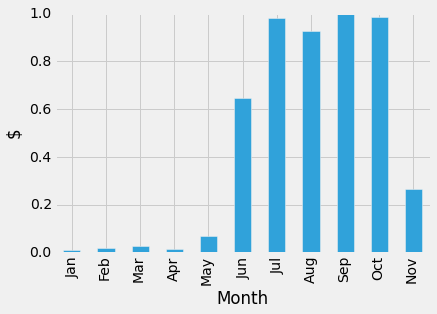

In [6]:
cand_ts("Trump", True)

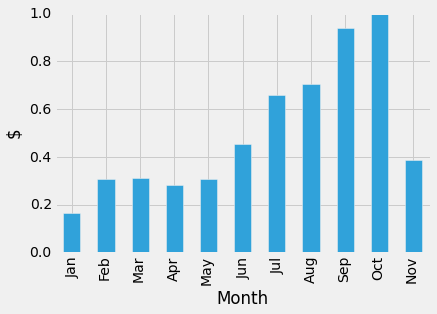

In [41]:
cand_ts("Clinton", True)

In [20]:
def share_by_field(field, values):
    #Function for plotting share of donations by field and user-selected values
    sub = pdf[pdf[field].isin(set(values))] #subset overall dataframe
    group = sub.groupby(["candidate", field])
    bucket_sums = group.amount.sum().unstack(0) #place into 2 column format
    normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1), axis = 0)
    normed_sums.plot(kind="barh", figsize=(8, 8))
    plt.xlabel("Proportion")

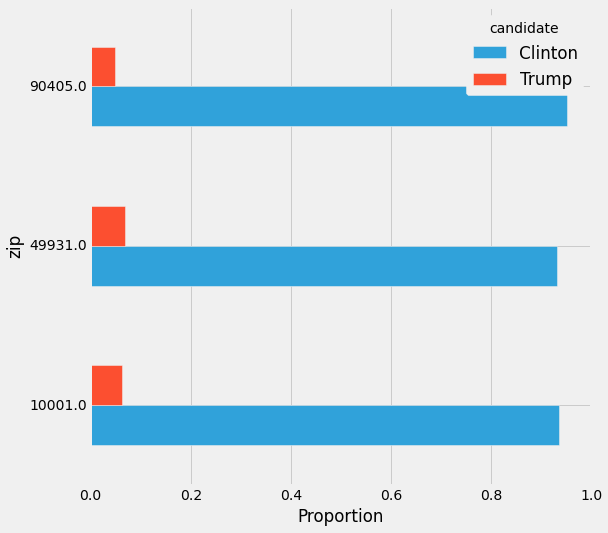

In [23]:
share_by_field("zip", [90405, 10001, 49931]) #Share of donations by selected states

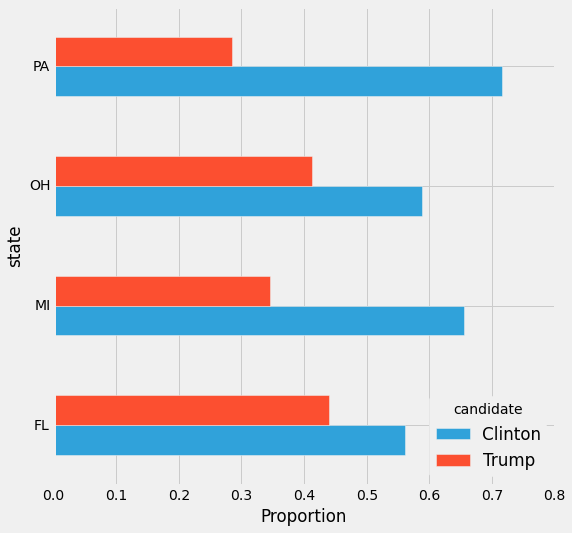

In [28]:
share_by_field("state", ["PA", "MI", "FL", "OH"])

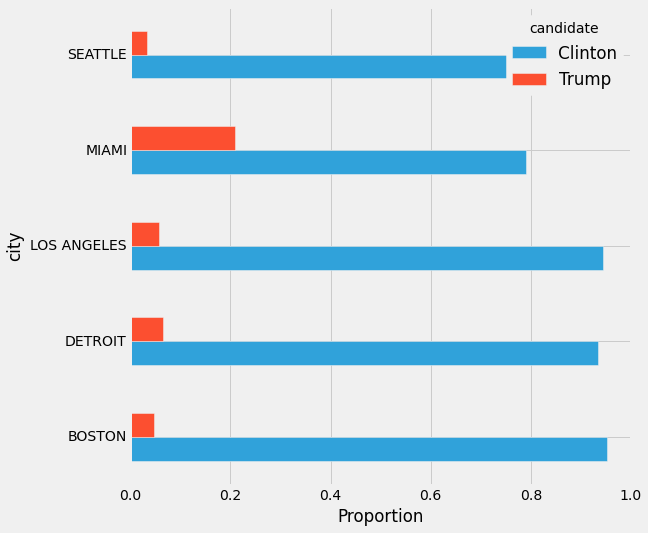

In [29]:
share_by_field("city", ["DETROIT", "LOS ANGELES", "MIAMI", "SEATTLE", "BOSTON"])

In [42]:
#Number of unique contributors by candidate
num_cont = pdf.groupby("candidate")["name"].agg(lambda x: np.size(np.unique(x.values)))
order_num_cont = num_cont.order(ascending = False)
order_num_cont

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\IPython\kernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


candidate
Trump      520469
Clinton    467237
Name: name, dtype: int64

In [48]:
#Median contribution amount by candidate
by_median = pdf.groupby("candidate")["amount"].agg(np.median)
by_median.sort_values(ascending = False)

candidate
Trump      72.3
Clinton    25.0
Name: amount, dtype: float64

In [52]:
def cand_city(candidate):
    #Top 10 cities contributing to a particular candidate
    cand = pdf[pdf.candidate == candidate]
    city = cand.groupby("city")["amount"].agg(sum)
    city.sort_values(ascending = False).head(10).plot(kind = "bar")

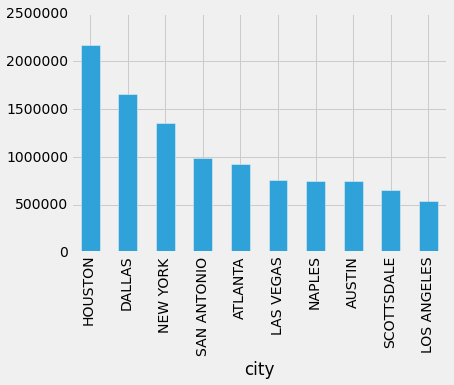

In [53]:
cand_city("Trump")

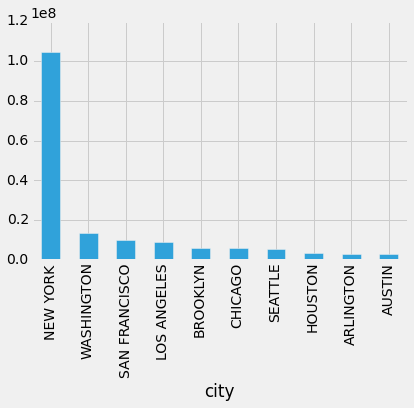

In [54]:
cand_city("Clinton")

In [55]:
trim = pdf[pdf.amount < 15000]
bins = np.array([0, 10, 100, 250, 1000, 15000]) #cutoffs for contribution bins
labels = pd.cut(trim.amount, bins)

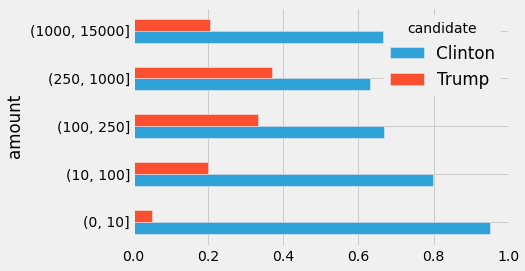

In [61]:
#Total amount of candidate donations grouped into buckets of various donation sizes
group = trim.groupby(["candidate", labels])
bucket_sums = group.amount.sum().unstack(0) #place into 2 column format
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1), axis = 0)
normed_sums.plot(kind="barh")

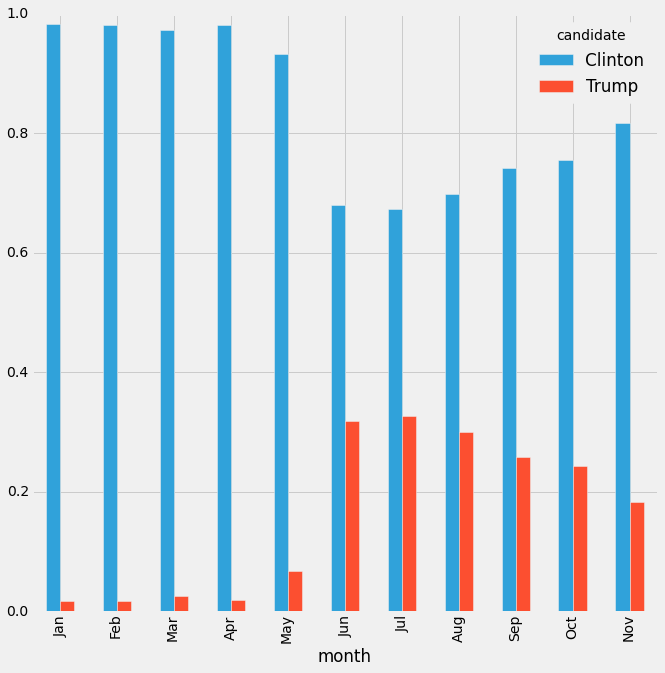

In [83]:
#Proportion of donations to each candidate by month
mgroup = pdf[~(pdf.month == "Dec")].groupby(["candidate", "month"])
mgroup = mgroup.amount.sum().unstack(0)
monthList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov']
mgroup = mgroup.ix[monthList]
mTotals = mgroup.sum(axis = 1) #sum across month rows
mProps = mgroup.div(mTotals, axis = 0) #proportions by month
mProps.plot(kind = "bar", figsize=(10, 10))